# Worksheet 12

Name:  Paul Martin Enano
UID: U75020763

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. This is an example of classification
2. This is not an example of classification
3. This is an example of classification
4. This is not an example of classification

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We'd split the data into a training and test set, and use them to evaluate the models performance.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

 Underfitting is when the model doesn't capture the data of the training set like if the model's inaccurate. A sign to look out for underfitting in a model would be if the model is accurate, in the training and test set, and this would also be an indication of if the data in the set is complex enough I suppose. 

 Overfitting is when the model captures the data of the training data too well, and when the model is tested on the test dataset, it doesn't accurately predict the points. A sign to look out for in this would be if there are many parameters in whichever model/regression you are running, which directly cooresponds to how bendy the model is.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

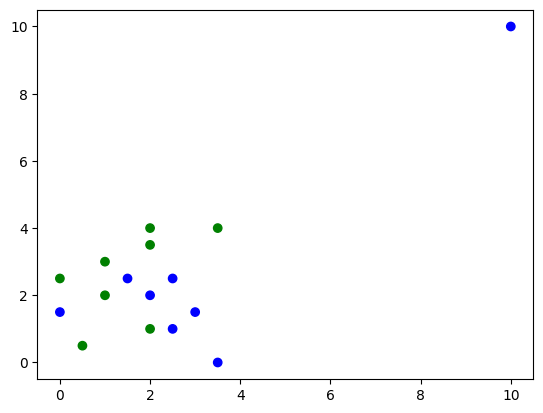

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The point at (10,10) is an outlier which should be removed

In [3]:
data["Attribute A"] = data["Attribute A"][:-1]
data["Attribute B"] = data["Attribute B"][:-1]
data["Class"] = data["Class"][:-1]

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

I don't see it on the graph but in the dataset, there is A: 0, B: 1.5, which is most likely noise

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

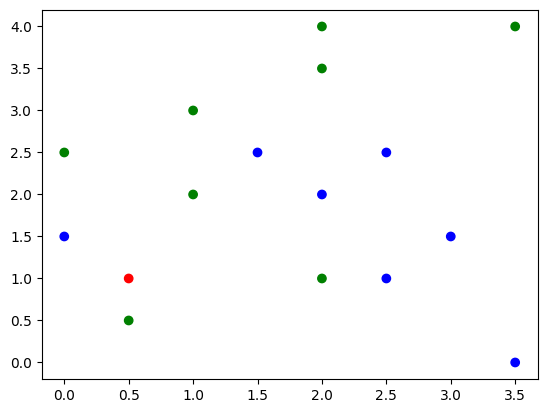

In [4]:
plt.scatter(data["Attribute A"] + [0.5], data["Attribute B"] + [1], color=colors[data["Class"] + [2]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

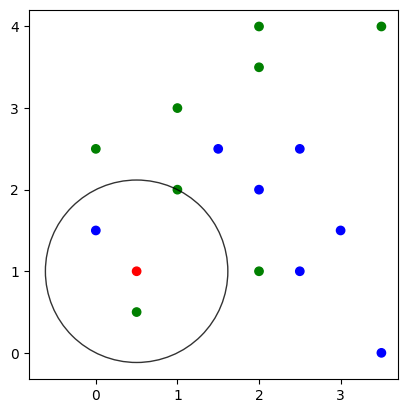

In [5]:
def n_closest_to(example, n):
    attr = np.column_stack((data["Attribute A"], data["Attribute B"]))
    dist = np.linalg.norm(attr - example, axis=1)
    sorted = np.argsort(dist)[:n]
    
    return sorted


location = ( 0.5 , 1 )
radius = np.linalg.norm(np.array([data["Attribute A"][n_closest_to(location, 3)[-1]], data["Attribute B"][n_closest_to(location, 3)[-1]]]) - np.array(location))

_, axes = plt.subplots()

axes.scatter(data["Attribute A"] + [0.5], data["Attribute B"] + [1], color=colors[data["Class"] + [2]].tolist())

cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority(points):
    classes = [data["Class"][i] for i in points]  
    counts = {}
    for cls in classes:
        if cls in counts:
            counts[cls] += 1
        else:
            counts[cls] = 1

    majority_class = max(counts, key=counts.get, default='DefaultClass')
    
    max_count = counts.get(majority_class, 0)
    if list(counts.values()).count(max_count) > 1:
        return 'DefaultClass'
    
    return majority_class

n_closest_indices = n_closest_to(location, 3)
assigned_class = majority(n_closest_indices)
print(f"The majority class is: {assigned_class}")


The majority class is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
for i in range(len(data["Attribute A"])):
    training_set = {"Attribute A": np.concatenate([data["Attribute A"][:i], data["Attribute A"][i+1:]]),
                    "Attribute B": np.concatenate([data["Attribute B"][:i], data["Attribute B"][i+1:]]),
                    "Class": np.concatenate([data["Class"][:i], data["Class"][i+1:]])}
    
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    n_closest_indices = n_closest_to(test_point, 3)
    prediction = majority(n_closest_indices)
    
    actual_class = data["Class"][i]
    if prediction == actual_class:
        count += 1
    
accuracy = count / len(data["Attribute A"])
print(f"overall accuracy = {accuracy}")

overall accuracy = 0.8


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

mnist = fetch_openml('mnist_784', version=1)

X = mnist.data / 255.0
y = mnist.target.astype('int64')

sample_size = 10000
random_sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X.iloc[random_sample_indices]
y_sample = y[random_sample_indices]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

100%|███████████████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]


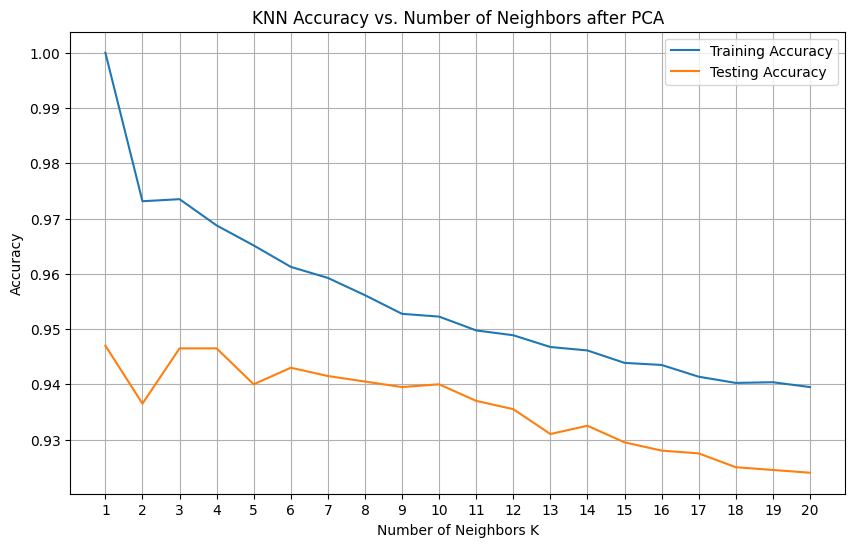

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

pca = PCA(n_components=0.95) # retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

training_accuracies = []
testing_accuracies = []

k_range = range(1, 21) 

for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    
    training_accuracies.append(knn.score(X_train_pca, y_train))
    testing_accuracies.append(knn.score(X_test_pca, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors after PCA')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


In [92]:
'From the model of the data that I created, I see that the k value of 1 has the most optimal accuracy'

'From the model of the data that I created, I see that the k value of 1 has the most optimal accuracy'

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

Training Accuracy: 0.967125
Testing Accuracy: 0.942


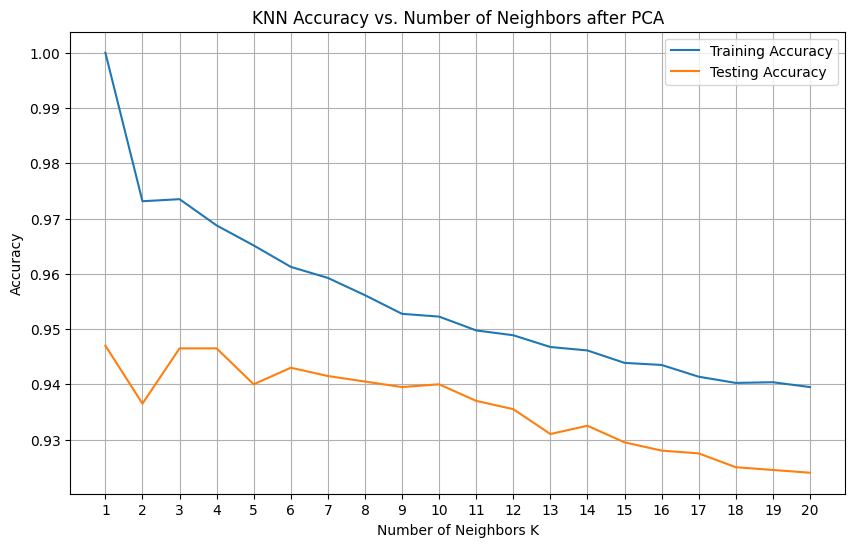

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize the data
y = mnist.target.astype('int64')

sample_size = 10000
random_sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X.iloc[random_sample_indices]
y_sample = y[random_sample_indices]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1)

pca_components = 0.95
knn_neighbors = 5  # A common default, but this could be optimized further
pipeline_model = make_pipeline(PCA(n_components=pca_components), KNeighborsClassifier(n_neighbors=knn_neighbors))

pipeline_model.fit(X_train, y_train)

training_accuracy = pipeline_model.score(X_train, y_train)
testing_accuracy = pipeline_model.score(X_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors after PCA')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

Training Accuracy: 0.964875
Testing Accuracy: 0.937


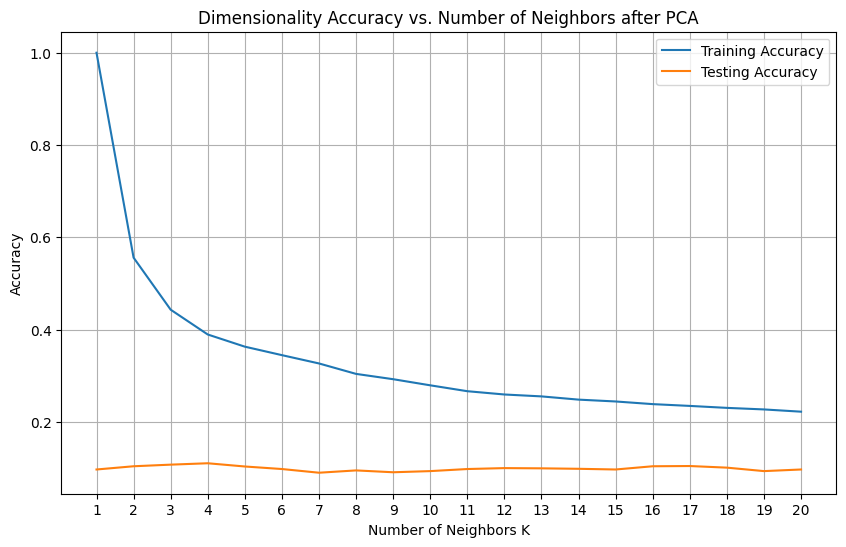

In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

pca_components = 0.95
knn_neighbors = 5  
pipeline_model = make_pipeline(PCA(n_components=pca_components), KNeighborsClassifier(n_neighbors=knn_neighbors))

pipeline_model.fit(X_train, y_train)

training_accuracy = pipeline_model.score(X_train, y_train)
testing_accuracy = pipeline_model.score(X_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('Dimensionality Accuracy vs. Number of Neighbors after PCA')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

'The accuracy values for the KNN model and the Dimesionality model, are the same, which I don't think is inherintly a problem to deal with. Again, the most optimal number of neighbors K to have in this is 1.

Choice of dimension: I chose to keep 95% of the data's variance when I used PCA to make the dataset simpler without losing much important information. This careful balance is really important because it helps us keep our model working well while also making it faster and less heavy on the computer.

Why the performance and accuracy has changed: From what I see, the accuracy has not changed, but the way the model looks definitely looks more tuned to the points in the dimensionality approach rather than the KNN approach which looks underfitted.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [95]:
'1. I chose to create the new features FamSize and Title because I thought they were the ones that made the most sense, and I could easily build off of them. For example, with Size, I would check if a person is traveling with people or traveling alone, and for the Title feature, I could check if someone is a Mr. Miss, etc.'
'3. Selecting an optimal value for k in the K-Nearest Neighbors algorithm was important. I opted for a range from 1 to 20 and employed cross-validation to find the k that maximized accuracy. This process helped us avoid overfitting to our training data and underfitting. And I noticed that the less features I inluded, the K value would change, which also makes sense because of the idea of overfitting and underfitting.'
'4. https://www.kaggle.com/competitions/titanic/leaderboard (Paul Enano, I have a score of .45215)'

'4. https://www.kaggle.com/competitions/titanic/leaderboard (Paul Enano, I have a score of .45215)'

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

def features(df):
    df['Size'] = df['SibSp'] + df['Parch'] + 1 
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    return df

def preprocess(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])
    df['Title'].fillna('Missing', inplace=True)
    df['Title'] = le.fit_transform(df['Title'])
    
    return df

train_df = features(train_csv)
train_df = preprocess(train_df)
test_df = features(test_csv)
test_df = preprocess(test_df)

features = ['Pclass', 'Sex', 'Age', 'Size', 'Embarked', 'Title']
X = train_df[features]
y = train_df['Survived']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

k_range = range(1, 21)
k_scores = []

for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimalK = k_range[np.argmax(k_scores)]
print(f"Best K: {optimalK}")

bestKNN = KNeighborsClassifier(n_neighbors=optimalK)
bestKNN.fit(X_train, y_train)

test_predictions = bestKNN.predict(test_df[features])

submission = pd.DataFrame({'PassengerId': test_csv['PassengerId'], 'Survived': test_predictions})
submission.to_csv('predictions.csv', index=False)

/var/folders/81/3_yv30h56l90szxy_4kqtdgh0000gn/T/ipykernel_37316/3208591388.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/81/3_yv30h56l90szxy_4kqtdgh0000gn/T/ipykernel_37316/3208591388.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Best K: 3
